# Matrices: normas y eigenvalores/eigenvectores

**Objetivo.** Revisar e ilustrar los conceptos de normas matriciales, sus eigenvalores y sus eigenvectores usando las bibliotecas `sympy` y `numpy`.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_01">MACTI-Algebra_Lineal_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME, proyectos PE101019 y PE101922.**

## Eigenvalores y Eigenvectores

Si $A$ es una matriz cuadrada, entonces definimos el número $\lambda$ (real o complejo) como **eigenvalor** (**valor propio** o **autovalor**) de $A$ si $A\vec{u} = \lambda \vec{u}$, o equivalentemente si $det(A - \lambda I) = 0$. El vector $\vec{u}$ se llama **eigenvector** (**vector propio** o **autovector**) de $A$. El conjunto de todos los autovalores de la matriz $A$ se denomina espectro de $A$ y se denota como $\rho(A)$.

In [11]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import macti.vis as mvis
import macti.math as mmat

In [12]:
# Definimos la siguiente matriz.
A = sympy.Matrix([[3.0, 2.0], [2.0, 6.0]])

# Convertimos la matriz A a un arreglo de numpy
A = np.array(A, dtype=float)
A

array([[3., 2.],
       [2., 6.]])

Los eigenvalores y eigenvectores se pueden calcular usando la función `np.linalg.eig()` `de numpy` como sigue:

In [13]:
np.linalg.eig(A)  # w: eigenvalues, v: eigenvectors

EigResult(eigenvalues=array([2., 7.]), eigenvectors=array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]]))

También podemos usar la función `macti.matem.eigen_land()` para obtener mayor información de los eigenvalores y eigenvectores como sigue:

In [14]:
wA, vA = mmat.eigen_land(A)

eigenvalores = [2. 7.]
eigenvectores:
 [-0.89442719  0.4472136 ] 
 [-0.4472136  -0.89442719]
ángulo entre eigenvectores = 90.0


Podemos graficar los eigenvectores:

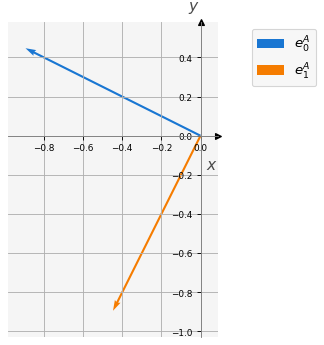

In [15]:
v = mvis.Plotter()
v.set_coordsys()
v.plot_vectors(1, [vA[:,0], vA[:,1]], ['$e_0^A$','$e_1^A$'])
v.grid()

Observa que en este caso los eigenvectores son ortogonales.

La relación 

$$
A \vec{u} = \lambda \vec{u}
$$

indica básicamente que al aplicar la matriz $A$ a un eigenvector $\vec{u}$, el resultado es el mismo vector escalado $\lambda \vec{u}$, es decir no lo rota. Cualquier otro vector, que no sea un múltiplo de los eigenvectores, será rotado. Veamos esto en el siguiente código:

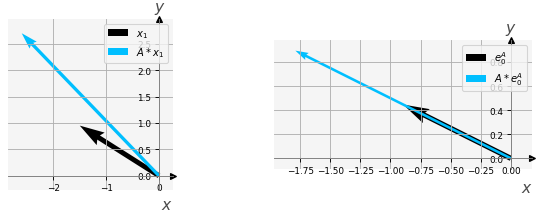

In [16]:
# definimos un vector
x1 = np.array([-1.5,0.95])

# Aplicamos la matriz A
r1 = A @ x1

# Ahora graficamos
v = mvis.Plotter(1, 2, fig_par=dict(figsize=(8,3)))

v.set_coordsys(1)
v.plot_vectors(1, [x1, r1], 
                  ['$x_1$', '$A * x_1$'], 
               w = [0.03, 0.02], lcolors = ['black', 'deepskyblue'])
v.set_coordsys(2)
v.plot_vectors(2, [vA[:,0], A @ vA[:,0]], 
                  ['$e_0^A$', '$A * e_0^A$'], 
               w = [0.02, 0.01], lcolors = ['black', 'deepskyblue'], ofx=-100.0)

v.legend([1,2], fontsize=9, ncol=1, loc='upper right')
v.grid()

Observamos que el eigenvectpr $e_0^A$ no rota cuando se le aplica $A$, pero el vector $\vec{x}_1$ si es rotado un cierto ángulo cuando le aplicamos la matriz $A$.

## Normas Matriciales.

La norma de una matriz $A$ es un número real positivo denotado por $||A||$.
Dadas cualesquiera dos matrices $A$ y $B$ se cumplen los siguiente axiomas.
1. $||A|| \ge 0$.
2. $||A|| = 0 \iff A = 0$.
3. $||aA|| = |a| ||A||$ para cualquier número real $a$.
4. $||A+B|| \le ||A|| + ||B||$ (desigualdad triangular).
5. $||AB|| \le ||A||||B||$ (compatibilidad).

Definimos la siguiente matriz

$$
M =
\begin{bmatrix}
-3 & 2 \\
1 & -5
\end{bmatrix}
$$


In [17]:
M = np.array([[-3, 2],[1, -5]])
M

array([[-3,  2],
       [ 1, -5]])

### Norma 1.
Consiste en sumar los valores absolutos de los elementos de cada **columna** y luego calular 
la suma máxima:
$$
||A||_1 = \max_{1 \le j \le n} \left( \sum_{i=1}^n  |a_{ij}| \right)
$$

In [18]:
A_n1 = np.linalg.norm(M,1)
print(A_n1)

7.0


### Norma $\infty$.
Consiste en sumar los valores absolutos de los elementos de cada **renglón** y luego calular 
la suma máxima:
$$
||A||_\infty = \max_{1 \le i \le n} \left( \sum_{j=1}^n  |a_{ij}| \right)
$$

In [19]:
A_nI = np.linalg.norm(M, np.inf)
print(A_nI)

6.0


### Norma de Frobenius

$$
||A||_F = \left( \sum_{i=1}^n \sum_{j=1}^n |a_{ij}|^2 \right)^{1/2}
$$

In [20]:
A_nFro = np.linalg.norm(M, 'fro')
print(A_nFro)

6.244997998398398


<div class="alert alert-success">

## Ejemplo 3.

Verificar que se cumplen los 5 axiomas de las normas matriciales para la Norma 1 usando la matriz $M$.
</div>

**Axioma 1**. $||M||_1 \geq 0$

In [21]:
M_n1 = np.linalg.norm(M,1 )
print('M =\n {}'.format(M))
print('∥M∥₁ = {}'.format(M_n1))

M =
 [[-3  2]
 [ 1 -5]]
∥M∥₁ = 7.0


**Axioma 2.** 

In [22]:
ZERO = np.array([[0.0, 0.0], [0.0, 0.0]])
ZERO_n1 = np.linalg.norm(ZERO,1)
print('ZERO = \n{}'.format(ZERO))
print('∥ZERO∥₁ = {}'.format(ZERO_n1))

ZERO = 
[[0. 0.]
 [0. 0.]]
∥ZERO∥₁ = 0.0


**Axioma 3.**

In [23]:
a = -3.5
a_M_n1 = np.linalg.norm(a * M, 1) 
print('∥M∥₁ = {}, \t a = {}'.format(M_n1, a))
print('\n ∥a * M∥₁ = {} \n |a| * ∥M∥₁ = {}'.format(a_M_n1, np.abs(a) * M_n1))

∥M∥₁ = 7.0, 	 a = -3.5

 ∥a * M∥₁ = 24.5 
 |a| * ∥M∥₁ = 24.5


**Axioma 4.**

In [24]:
N = np.arange(4).reshape(2,2)

M_p_N_n1= np.linalg.norm(M + N, 1)

N_n1 = np.linalg.norm(N, 1)

print('\nNorma 1:')
print(' ∥M + N∥₁ = {}'.format(M_p_N_n1))
print(' ∥M∥₁ + ∥N∥₁ = {}'.format(M_n1 + N_n1))
print(' ¿ ∥M + N∥₁ ≤ ∥M∥₁ + ∥N∥₁ ? ⮕ {}'.format(M_p_N_n1 <= M_n1 + N_n1))


Norma 1:
 ∥M + N∥₁ = 6.0
 ∥M∥₁ + ∥N∥₁ = 11.0
 ¿ ∥M + N∥₁ ≤ ∥M∥₁ + ∥N∥₁ ? ⮕ True


**Axioma 5.**

In [25]:
M_x_N_n1= np.linalg.norm(M * N, 1)

print('\nNorma 1:')
print(' ∥M * N∥₁ = {}'.format(M_x_N_n1))
print(' ∥M∥₁ * ∥N∥₁ = {}'.format(M_n1 * N_n1))
print(' ¿ ∥M * N∥₁ ≤ ∥M∥₁ * ∥N∥₁ ? ⮕ {}'.format(M_x_N_n1 <= M_n1 * N_n1))


Norma 1:
 ∥M * N∥₁ = 17.0
 ∥M∥₁ * ∥N∥₁ = 28.0
 ¿ ∥M * N∥₁ ≤ ∥M∥₁ * ∥N∥₁ ? ⮕ True


### Número de condición

El número de condición de una matriz $A$ se define como

$$
\kappa(A) = ||A|| \; ||A^{-1}||
$$

Este número siempre es más grande o igual a 1. Además nos da información 
acerca de que tan bien o mal está definido un problema que depende de la matriz en cuestión.
Entre más grande sea este número es más difícil de resolver el problema.

In [26]:
A = np.array([[3., 2.],[2., 6.]])
print(A)
# Calculamos el número de condición usando funciones de numpy
kA_F = np.linalg.norm(A, 'fro') * np.linalg.norm(np.linalg.inv(A), 'fro')
print('𝜅(A) = {}'.format(kA_F))

[[3. 2.]
 [2. 6.]]
𝜅(A) = 3.7857142857142847


In [27]:
# Existe una función para calcular el número de condición directamente
kA_F = np.linalg.cond(A, 'fro')
print('𝜅(A) = {}'.format(kA_F))

𝜅(A) = 3.7857142857142847


In [28]:
# Matriz con un número de condición más grande
B = np.array([[0.10, -1],[0.30, -1]])
kB_F = np.linalg.cond(B, 'fro')
print(B)
print('𝜅(B) = {}'.format(kB_F))

[[ 0.1 -1. ]
 [ 0.3 -1. ]]
𝜅(B) = 10.5


In [29]:
# Matriz mal condicionada
C = np.array([[0.10, -1000],[0.30, -1]])
kC_F = np.linalg.cond(C, 'fro')
print(C)
print('𝜅(C) = {}'.format(kC_F))

[[ 1.e-01 -1.e+03]
 [ 3.e-01 -1.e+00]]
𝜅(C) = 3334.448482827609
